### Lab Activity 4.3: Analyzing Student Performance Using T-Tests and Z-Tests – A Statistical Approach



#### Objective
To analyze student performance and determine if there are statistically significant differences between different groups (e.g., gender, study time) using T-Tests and Z-Tests.



#### Equipment/Tools Required
- Computer with Python and Jupyter Notebook installed
- Dataset: Student Performance (https://archive.ics.uci.edu/dataset/320/student+performance)
- Python Libraries: pandas, numpy, scipy, matplotlib, seaborn, statsmodels



#### Prerequisites
- Basic understanding of Python programming
- Knowledge of statistics, including hypothesis testing, T-Tests, and Z-Tests
- Familiarity with pandas for data manipulation
- Understanding of data visualization using matplotlib and seaborn



#### Problem Statement
The lab aims to analyze the impact of various factors, such as gender and study time, on student performance using statistical hypothesis testing. 
By applying T-Tests and Z-Tests, we will evaluate whether differences in student scores are statistically significant. 
The experiment will provide insights into whether these factors play a measurable role in academic performance and will help in making data-driven educational decisions.


In [3]:


# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm
from statsmodels.stats.weightstats import ztest


In [4]:

# Step 2: Load Dataset
df = pd.read_csv("student-mat.csv", sep=';')  # Update with correct file path


In [7]:

# Step 3: Data Inspection
print(df.head())
print(df.info())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [8]:

print(df.describe())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [9]:

print(df.isnull().sum())  # Check for missing values


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


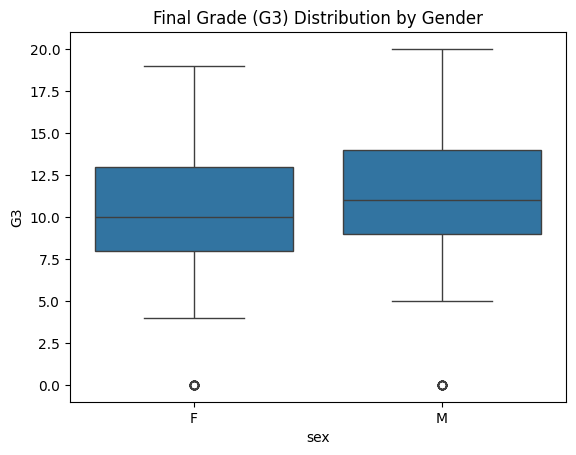

In [10]:

# Step 4: Exploratory Data Analysis (EDA)
sns.boxplot(x='sex', y='G3', data=df)
plt.title("Final Grade (G3) Distribution by Gender")
plt.show()


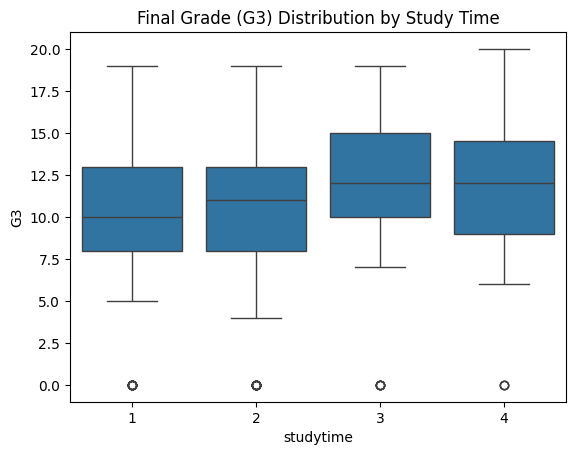

In [11]:

sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Final Grade (G3) Distribution by Study Time")
plt.show()


In [12]:

# Step 5: Hypothesis Testing
# H0: No significant difference in performance based on gender
# H1: A significant difference exists

def perform_ttest(score_column):
    male_scores = df[df['sex'] == 'M'][score_column]
    female_scores = df[df['sex'] == 'F'][score_column]
    t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)  # Welch’s t-test
    return t_stat, p_value

# Conduct t-tests
g3_t, g3_p = perform_ttest('G3')

# Display results
print(f"Final Grade (G3) T-test: t-statistic = {g3_t:.3f}, p-value = {g3_p:.5f}")


Final Grade (G3) T-test: t-statistic = 2.065, p-value = 0.03958


In [13]:

# Step 6: Z-Test (Comparing study time groups)
low_study = df[df['studytime'] <= 2]['G3']
high_study = df[df['studytime'] > 2]['G3']

z_stat, z_p_value = ztest(low_study, high_study)
print(f"Study Time Z-test: z-statistic = {z_stat:.3f}, p-value = {z_p_value:.5f}")


Study Time Z-test: z-statistic = -2.267, p-value = 0.02338


In [14]:

# Step 7: Interpretation
alpha = 0.05  # Significance level

def interpret_results(p_value, test_name):
    if p_value < alpha:
        print(f"There is a significant difference ({test_name}, p < 0.05). Reject H0.")
    else:
        print(f"No significant difference ({test_name}, p >= 0.05). Fail to reject H0.")

interpret_results(g3_p, "Gender-based T-Test")
interpret_results(z_p_value, "Study Time-based Z-Test")


There is a significant difference (Gender-based T-Test, p < 0.05). Reject H0.
There is a significant difference (Study Time-based Z-Test, p < 0.05). Reject H0.




#### Conclusion
- The hypothesis tests determine if there are statistically significant differences in student performance based on gender and study time.
- Interpretation of p-values helps decide whether differences exist in academic performance.
- Further analysis can explore other factors such as parental education and support programs.



In [16]:
# Step 5: Hypothesis Testing
# H0: No significant difference in performance based on gender
# H1: A significant difference exists

def perform_ttest(score_column):
    male_scores = df[df['sex'] == 'M'][score_column]
    female_scores = df[df['sex'] == 'F'][score_column]
    t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)  # Welch’s t-test
    return t_stat, p_value

# Conduct t-tests
g3_t, g3_p = perform_ttest('G3')

# Display results
print(f"Final Grade (G3) T-test: t-statistic = {g3_t:.3f}, p-value = {g3_p:.5f}")

# Step 6: Z-Test (Comparing study time groups)
low_study = df[df['studytime'] <= 2]['G3']
high_study = df[df['studytime'] > 2]['G3']

z_stat, z_p_value = ztest(low_study, high_study)
print(f"Study Time Z-test: z-statistic = {z_stat:.3f}, p-value = {z_p_value:.5f}")

# Step 7: Interpretation
alpha = 0.05  # Significance level

def interpret_results(p_value, test_name):
    if p_value < alpha:
        print(f"There is a significant difference ({test_name}, p < 0.05). Reject H0.")
    else:
        print(f"No significant difference ({test_name}, p >= 0.05). Fail to reject H0.")

interpret_results(g3_p, "Gender-based T-Test")
interpret_results(z_p_value, "Study Time-based Z-Test")

Final Grade (G3) T-test: t-statistic = 2.065, p-value = 0.03958
Study Time Z-test: z-statistic = -2.267, p-value = 0.02338
There is a significant difference (Gender-based T-Test, p < 0.05). Reject H0.
There is a significant difference (Study Time-based Z-Test, p < 0.05). Reject H0.
